In [178]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from collections import Counter

plt.style.use('bmh')

In [224]:
data = pd.read_parquet('local_data/full_data.parquet')
user_data = pd.read_csv('data/users.csv')
movie_data = pd.read_csv('data/movies.csv', encoding='latin-1')
data.head()

,user_id,movie_id,rating,timestamp,ratings_month,ratings_day,ratings_hour,user_gender,user_age,user_job,user_zip,user_city,user_state,movie_title,movie_genre,movie_year
0,1,1193,5,978300760,12,6,22,1.0,1,10,48067.0,Royal Oak,MI,One Flew Over the Cuckoo's Nest,[Drama],1975
1,1,661,3,978302109,12,6,22,1.0,1,10,48067.0,Royal Oak,MI,James and the Giant Peach,"[Animation, Children's, Musical]",1996
2,1,914,3,978301968,12,6,22,1.0,1,10,48067.0,Royal Oak,MI,My Fair Lady,"[Musical, Romance]",1964
3,1,3408,4,978300275,12,6,22,1.0,1,10,48067.0,Royal Oak,MI,Erin Brockovich,[Drama],2000
4,1,2355,5,978824291,1,5,23,1.0,1,10,48067.0,Royal Oak,MI,"Bug's Life, A","[Animation, Children's, Comedy]",1998


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1000209 non-null  int64  
 1   movie_id       1000209 non-null  int64  
 2   rating         1000209 non-null  int64  
 3   timestamp      1000209 non-null  int64  
 4   ratings_month  1000209 non-null  int32  
 5   ratings_day    1000209 non-null  int32  
 6   ratings_hour   1000209 non-null  int32  
 7   user_gender    1000209 non-null  float64
 8   user_age       1000209 non-null  int64  
 9   user_job       1000209 non-null  int64  
 10  user_zip       1000209 non-null  float64
 11  user_city      1000209 non-null  object 
 12  user_state     1000209 non-null  object 
 13  movie_title    1000209 non-null  object 
 14  movie_genre    1000209 non-null  object 
 15  movie_year     1000209 non-null  int64  
dtypes: float64(2), int32(3), int64(7), object(4)
memory us

# Ratings Data

Text(0.5, 1.0, 'Distribution of ratings')

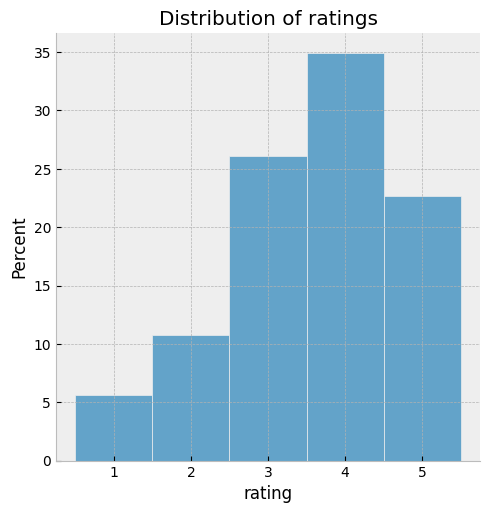

In [181]:
sns.displot(data=data, x="rating", bins=5, discrete=True, stat='percent')
plt.title("Distribution of ratings")

We notice that there are far less movies for rating 1 and 2. This could be due to the fact that:
1. Users know what they like to watch and don't bother with lower rated movies.
2. Users don't bother rating movies they did not like.

Either way, our data is skewed towards higher rated movies.

Text(0.5, 1.0, 'Distribution of user activity in hours')

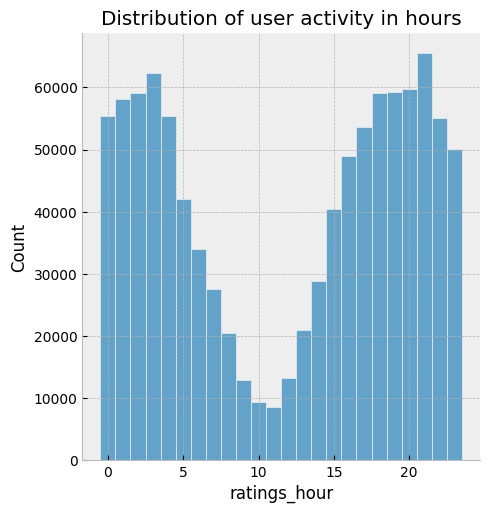

In [182]:
sns.displot(data=data, x="ratings_hour", discrete=True)
plt.title("Distribution of user activity in hours")

We see that most users are active during the late-night hours to the early hours past midnight, and the lowest activity is around noon.

Text(0.5, 1.0, 'Distribution of user activity in days')

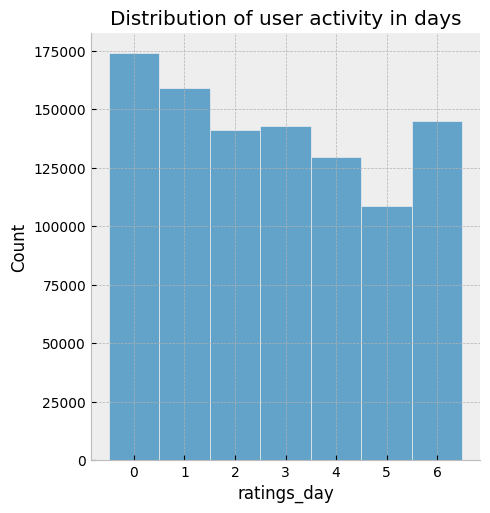

In [183]:
sns.displot(data=data, x="ratings_day", discrete=True)
plt.title("Distribution of user activity in days")

Users are active most on Sunday (0) and actvity decrases throughout the week before increasing again on Saturday (6)

Text(0.5, 1.0, 'Distribution of user activity in months')

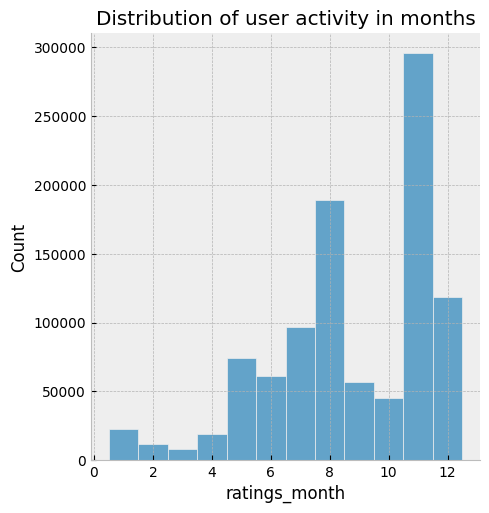

In [184]:
sns.displot(data=data, x="ratings_month", discrete=True)
plt.title("Distribution of user activity in months")

Users are most active during the second half of the year with highest in November

# User Info

Text(0.5, 1.0, 'Distribution of user occupations')

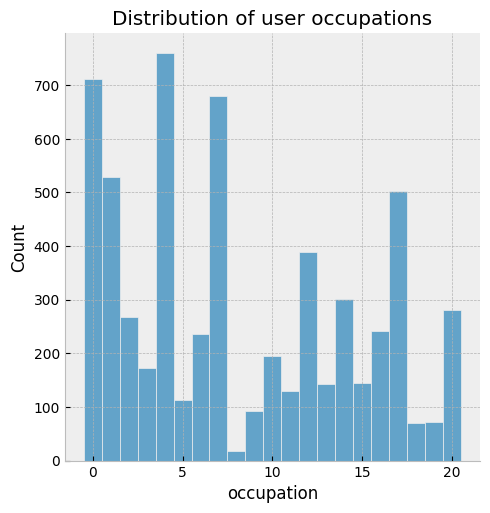

In [185]:
sns.displot(data=user_data, x="occupation", discrete=True)
plt.title("Distribution of user occupations")

User occupation is not uniformaly distributed with the most activity (apart from other (0)) being college/grad students (4) and executive/manegerial (7). Check [enum.txt](enum.txt) for definitions.

Text(0.5, 1.0, 'Distribution of user ages')

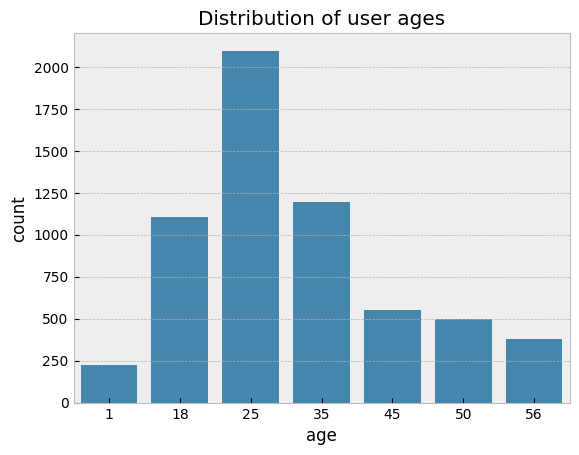

In [186]:
sns.countplot(data=user_data, x="age")
plt.title("Distribution of user ages")

The majority of users are in the age-index 25, meaning betweem 25 to 34 years old. Check [enum.txt](enum.txt) for definitions.

Text(0.5, 1.0, 'Distribution of user ages')

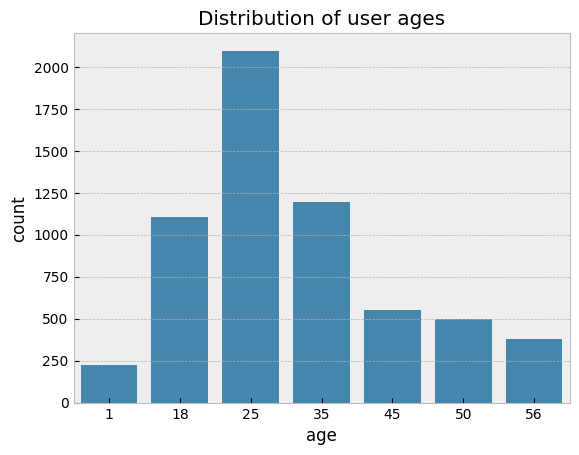

In [187]:
sns.countplot(data=user_data, x="age")
plt.title("Distribution of user ages")

Text(0.5, 1.0, 'Distribution of user gender')

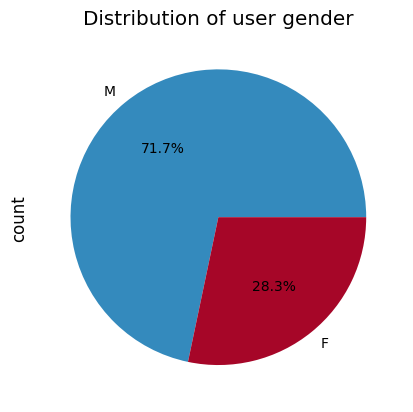

In [206]:
user_data.gender.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of user gender")

# Movie Info

<Axes: xlabel='movie_year', ylabel='count'>

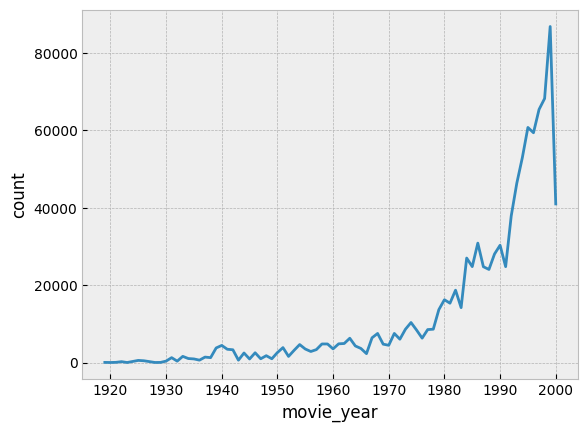

In [210]:
movie_views = data.movie_year.value_counts().sort_index(ascending=True)
sns.lineplot(movie_views)

This dataset contains ratings from the year 2000. It looks like users favor films released during the 90s. However, this could be due to an increase in movies released.

<Axes: ylabel='count'>

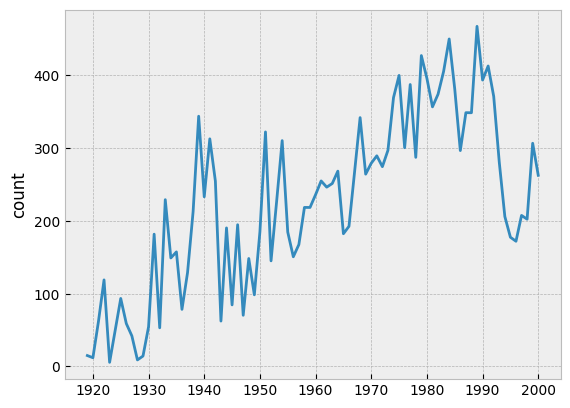

In [214]:
movie_years = movie_data.title.str.extract(r'\((\d{4})\)', expand=False).astype(int)

movie_counts = movie_years.value_counts()

sns.lineplot(movie_views / movie_counts)

Once normalized with movies released in a year, we see that users are less fond of movies in the 90s as compared to previous decades.

In [216]:
data.movie_genre.explode('genres').value_counts(normalize=True)

movie_genre
Comedy         0.169653
Drama          0.168678
Action         0.122493
Thriller       0.090246
Sci-Fi         0.074837
Romance        0.070188
Adventure      0.063732
Crime          0.037844
Horror         0.036343
Children's     0.034345
War            0.032604
Animation      0.020598
Musical        0.019761
Mystery        0.019116
Fantasy        0.017271
Western        0.009841
Film-Noir      0.008688
Documentary    0.003763
Name: proportion, dtype: float64

Comedy and drama are the most popular genres in the dataset followed by Action, Thriller, and Sci-Fi.

In [220]:
data.user_state.value_counts(normalize=True).head(5)

user_state
CA    0.181657
NY    0.071437
MN    0.064256
IL    0.052989
TX    0.052090
Name: proportion, dtype: float64

A majority of user activity originates from CA and NY.

In [221]:
data.user_city.value_counts(normalize=True).head(5)

user_city
Minneapolis      0.025355
New York         0.024169
San Francisco    0.021622
Saint Paul       0.020787
Chicago          0.020049
Name: proportion, dtype: float64

However, city wise Minneapolis and New York are the top two followed by San Francisco.

In [249]:
users_by_zip = data.groupby('user_zip')['user_id'].nunique()
zip_activity = users_by_zip.value_counts().reset_index()

sns.lineplot(data=zip_activity, x=user_id, y=count)


NameError: name 'user_id' is not defined

In [245]:
user_data.zip.value_counts()

zip
48104    19
22903    18
55104    17
94110    17
55455    16
         ..
80236     1
19428     1
33073     1
99005     1
14706     1
Name: count, Length: 3439, dtype: int64